<a href="https://colab.research.google.com/github/guedesiw/air-quality-india/blob/master/AirQualityIndia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import io,csv
import requests
import matplotlib.pyplot as plt
import numpy
import gzip
import seaborn as sns
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt

In [13]:

uploaded = files.upload()

Saving city_day.csv to city_day (1).csv


In [115]:
ds = pd.read_csv('city_day.csv')
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25555 entries, 0 to 25554
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        25555 non-null  object 
 1   Date        25555 non-null  object 
 2   PM2.5       21300 non-null  float64
 3   PM10        14853 non-null  float64
 4   NO          21046 non-null  float64
 5   NO2         22396 non-null  float64
 6   NOx         21534 non-null  float64
 7   NH3         15770 non-null  float64
 8   CO          23556 non-null  float64
 9   SO2         22056 non-null  float64
 10  O3          22045 non-null  float64
 11  Benzene     20433 non-null  float64
 12  Toluene     18146 non-null  float64
 13  Xylene      9138 non-null   float64
 14  AQI         21304 non-null  float64
 15  AQI_Bucket  21304 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.1+ MB


In [116]:
ds = ds.dropna()
ds.head(200)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
1959,Amaravati,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate
1960,Amaravati,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate
1961,Amaravati,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate
1962,Amaravati,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate
1963,Amaravati,2017-11-29,72.47,114.84,5.23,23.20,16.59,12.25,0.16,10.55,109.74,0.21,4.71,0.08,173.0,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2264,Amaravati,2018-09-26,24.08,45.81,8.17,27.49,21.37,18.56,0.84,13.47,27.49,0.03,0.07,0.12,62.0,Satisfactory
2273,Amaravati,2018-10-05,25.88,56.44,6.94,17.79,15.20,15.01,0.84,12.41,27.48,0.04,0.21,0.10,56.0,Satisfactory
2274,Amaravati,2018-10-06,49.70,109.35,8.38,25.91,20.65,17.96,0.76,14.31,46.63,0.05,0.16,0.10,80.0,Satisfactory
2277,Amaravati,2018-10-09,65.16,184.84,22.45,52.69,46.28,18.53,1.07,25.50,37.46,0.08,0.14,0.10,142.0,Moderate


In [117]:
ds['AQI_Bucket'] = ds.AQI_Bucket.astype('category')
ds['AQI_Bucket'].cat.categories
ds['AQI_Bucket'] = ds['AQI_Bucket'].cat.codes
ds.head(200)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
1959,Amaravati,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,1
1960,Amaravati,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,1
1961,Amaravati,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,1
1962,Amaravati,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,1
1963,Amaravati,2017-11-29,72.47,114.84,5.23,23.20,16.59,12.25,0.16,10.55,109.74,0.21,4.71,0.08,173.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2264,Amaravati,2018-09-26,24.08,45.81,8.17,27.49,21.37,18.56,0.84,13.47,27.49,0.03,0.07,0.12,62.0,3
2273,Amaravati,2018-10-05,25.88,56.44,6.94,17.79,15.20,15.01,0.84,12.41,27.48,0.04,0.21,0.10,56.0,3
2274,Amaravati,2018-10-06,49.70,109.35,8.38,25.91,20.65,17.96,0.76,14.31,46.63,0.05,0.16,0.10,80.0,3
2277,Amaravati,2018-10-09,65.16,184.84,22.45,52.69,46.28,18.53,1.07,25.50,37.46,0.08,0.14,0.10,142.0,1


In [118]:
ds = ds.drop(['City','Date'], axis=1)
ds.head(200)

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
1959,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,1
1960,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,1
1961,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,1
1962,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,1
1963,72.47,114.84,5.23,23.20,16.59,12.25,0.16,10.55,109.74,0.21,4.71,0.08,173.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2264,24.08,45.81,8.17,27.49,21.37,18.56,0.84,13.47,27.49,0.03,0.07,0.12,62.0,3
2273,25.88,56.44,6.94,17.79,15.20,15.01,0.84,12.41,27.48,0.04,0.21,0.10,56.0,3
2274,49.70,109.35,8.38,25.91,20.65,17.96,0.76,14.31,46.63,0.05,0.16,0.10,80.0,3
2277,65.16,184.84,22.45,52.69,46.28,18.53,1.07,25.50,37.46,0.08,0.14,0.10,142.0,1


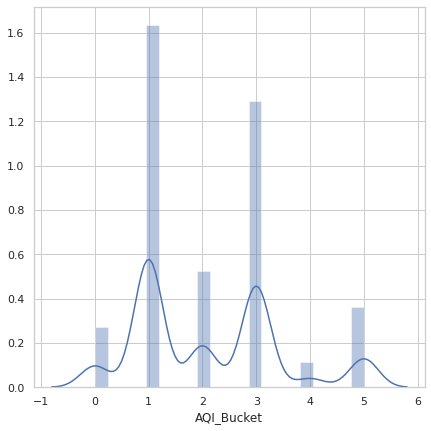

In [119]:
plt.figure(figsize = (7,7))
sns.set(style = "whitegrid")
f = sns.distplot(ds["AQI_Bucket"])

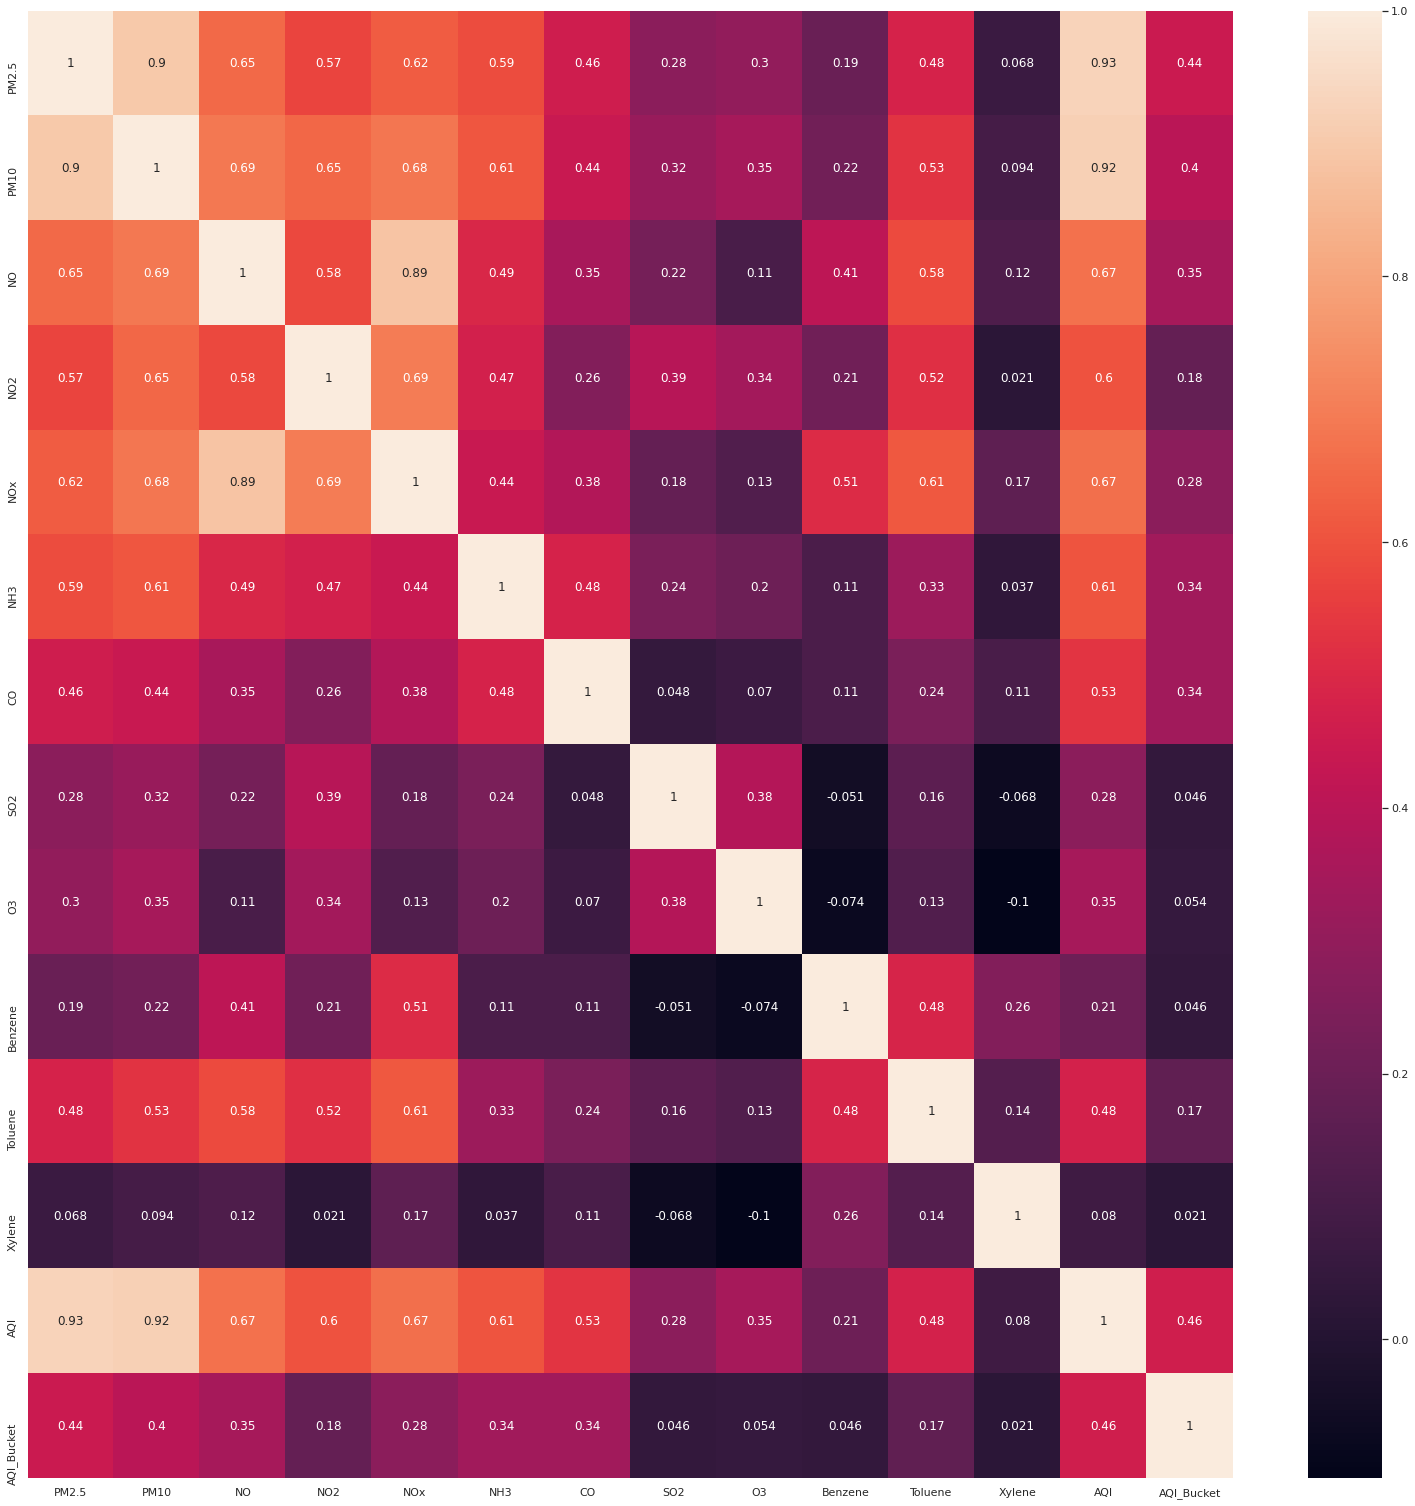

In [120]:
import seaborn as sns
plt.figure(figsize=(27,27))
sns.heatmap(ds.corr(), annot=True)

In [0]:
X = ds[['PM2.5', 'PM10',	'NO',	'NO2',	'NOx',	'NH3',	'CO',	'SO2',	'O3',	'Benzene',	'Toluene',	'Xylene',	'AQI']]
y = ds['AQI_Bucket']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=200)

In [123]:
print("X_train shape: {}".format(X_train.shape)) #
print("y_train shape: {}".format(y_train.shape)) #
print("X_test shape: {}".format(X_test.shape)) #
print("y_test shape: {}".format(y_test.shape)) #

X_train shape: (3147, 13)
y_train shape: (3147,)
X_test shape: (1350, 13)
y_test shape: (1350,)


In [124]:
knn = KNeighborsClassifier(n_neighbors=3) # normalmente pega-se numeros impares. 
knn.fit(X_train, y_train) # Incicia o treinamento

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [0]:
knn_pred = knn.predict(X_test)

In [126]:
print("Test set predictions:\n {}".format(knn_pred))

Test set predictions:
 [0 1 3 ... 1 3 3]


In [127]:
print("Test set score: {:.2f}".format(np.mean(knn_pred == y_test)))

Test set score: 0.93


In [128]:
acuracia = sqrt(mean_squared_error(y_true=y_test, y_pred=knn_pred))
print(acuracia)

0.5931710140017395


In [129]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [130]:
regr_pred = regr.predict(X_test)
print("Test set predictions: {}".format(regr_pred))

Test set predictions: [1.73489544 2.18632487 1.72654872 ... 1.77531692 1.74760353 1.61018932]


In [131]:
print("Test set score: {}".format(np.mean(regr_pred == y_test)))

Test set score: 0.0


In [132]:
acuracia = sqrt(mean_squared_error(y_true=y_test, y_pred=airquality_y_pred))
print(acuracia)

1.1523699330969346


In [133]:
arvore = DecisionTreeRegressor(max_depth=50)
arvore.fit(X_train, y_train)
arvore_pred = arvore.predict(X_test)
print("Test set predictions: {}".format(arvore_pred))

Test set predictions: [0. 1. 3. ... 1. 3. 3.]


In [134]:
print("Test set score: {}".format(np.mean(arvore_pred == y_test)))

Test set score: 1.0


In [135]:
acuracia = sqrt(mean_squared_error(y_true=y_test, y_pred=arvore_pred))
print(acuracia)

0.0
